In [44]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import pickle

In [3]:
os.chdir('/Users/purpleblack/Documents/Learning/Springboard/Capstone Project 1/The Project/Pickled files')

file = open('cleaned_dataset.pkl','rb')
dataset = pickle.load(file)

In [5]:
dataset

,title,text,subject,Real/Fake
0,as us budget fight looms republicans flip thei...,washington administration has already been wi...,politicsNews,REAL
1,us military to accept transgender recruits on ...,washington transgender people will be allowe...,politicsNews,REAL
2,senior us republican senator let mr mueller do...,washington several members of the trump campa...,politicsNews,REAL
3,fbi russia probe helped by australian diplomat...,washington trump campaign adviser george pap...,politicsNews,REAL
4,trump wants postal service to charge much more...,seattlewashington the other biggest players i...,politicsNews,REAL
...,...,...,...,...
44893,mcpain john mccain furious that iran treated u...,century wire says as reported earlier this w...,Middle-east,FAKE
44894,justice yahoo settles email privacy classactio...,century wire says it s a familiar theme whene...,Middle-east,FAKE
44895,sunnistan us and allied ‘safe zone’ plan to ta...,patrick henningsen century wireremember when...,Middle-east,FAKE
44896,how to blow million al jazeera america finall...,century wire says al jazeera america will go ...,Middle-east,FAKE


The real news and the fake news are ordered. Time to shuffle them up

## Step 1: Sampling the dataset

In [8]:
df = dataset.sample(frac = 1) #frac = 1 means that the entire dataset is returned.

In [9]:
df

,title,text,subject,Real/Fake
40343,copycat muslim terrorist arrested with assault...,assimilation fail a french muslim has been arr...,left-news,FAKE
19372,trump says north koreas kim will be tested lik...,washington north korea s kim jong un will b...,worldnews,REAL
40644,boycottstarbucks…ceo puts leftist agenda over ...,starbucks has pledged to hire refugees in res...,left-news,FAKE
25453,watch joy behar crushes newt gingrich on ‘the...,newt gingrich just got owned by the ladies of ...,News,FAKE
15305,brazilian congressional committee votes to ban...,brasilia a congressional committee led by ev...,worldnews,REAL
...,...,...,...,...
23337,trump embarrasses himself with yet another de...,on sunday morning donald trump once again reve...,News,FAKE
4256,separate mothers and children how a trump thre...,washington a week later in a town hall with ...,politicsNews,REAL
15803,a century on uks jewish homeland declaration s...,londonjerusalem in a statement composed ye...,worldnews,REAL
20460,factbox over four million lose power in florid...,,worldnews,REAL


## Step 2: Splitting the data into test and train datasets

In [13]:
#Note that the data taken into consideration as X is the text part. I'll go into titles and see if I can get a similar result.

X_train,X_test,y_train,y_test = train_test_split(df['text'],df['Real/Fake'], train_size = 0.8, random_state = 42)

## Step 3 : Creating a Vectorizer

The following is an explanation of how Tfidf Vectorizer works 



Credits: (Getting Started with Text Vectorization - Shirley Chen)

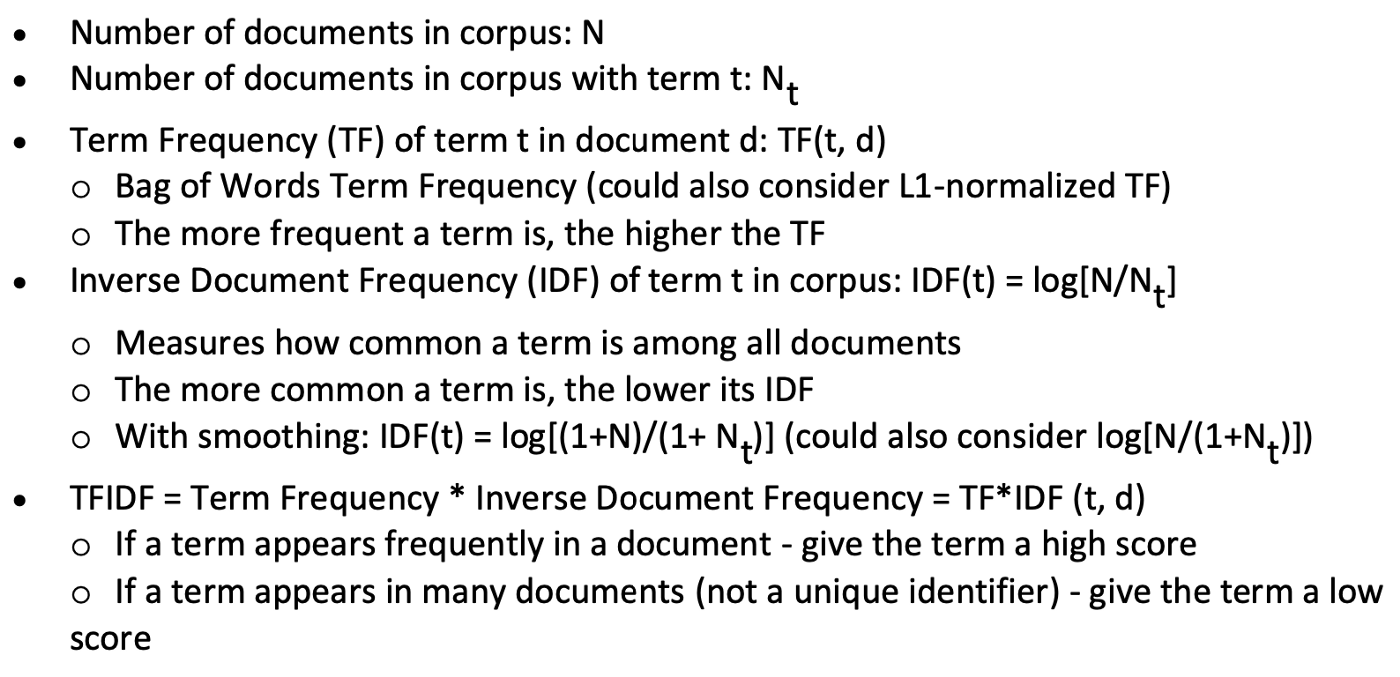

### Long story short:

tf measures how many times a document. A higher score is given for more frequently occuring words. Eg: A news about Trump could have the word Trump multiple times. It even could be the most used word in the news article.

idf on the other hand checks for words that frequently occur in all documents (i.e news articles). Words like 'the' ,'and', 'in' are words that appear in every news article. 

Another example to help drive the point home is if we had a dataset that contained only news articles from 'College Park,Maryland'. Almost every news article will start with "College Park, Maryland: ............". This means the three words 'College','Park','Maryland' would be the top 3 most used words in the corpus (which obfuscates the actual top 10 words we're looking for). Idf checks if the word appears in the whole corpus multiple times (we can specify a threshold).

In [17]:
#Create a tfidf vectorizer. The max_df parameter tells the classifier to ignore words if they exceed the value (0.7). this gets rid of corpus-specific stop words.
vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

#Training and transforming the vectorizer
vec_train = vectorizer.fit_transform(X_train)
vec_test = vectorizer.transform(X_test)

## Step 4: Create a Passive Aggressive Classifier

The Passive Aggressive Classifier works on the following principle:

1) If the classifier is correct, the classifier does nothing.

2) If the classifier is incorrect, aggressive penalties are enforced.


This is like taking your girlfriend out to dinner when she says "We can go wherever you want to. I'm not hungry"  
* If you're right, nothing's going happen. 
* If you're wrong, all hell breaks loose and you'll remember it the next time she says the same thing.

In [23]:
pas_agg_classifier = PassiveAggressiveClassifier(max_iter= 50) #max_iter is the maximum number of passes along the training data during the fit process.

#Training the classifier
pas_agg_classifier.fit(vec_train, y_train)


#Testing the classifier
y_pred = pas_agg_classifier.predict(vec_test)
score = accuracy_score(y_pred,y_test)
print('The accuracy % of the classifier is:',round(score * 100,2)) #Converting the score to percentage and rounding it to two place

The accuracy % of the classifier is: 98.17


We got an accuracy of 98.7%. That's great!

## Step 5: Confusion Matrix

To get better insights into the model's predictions, we can look at a confusion matrix. This shows the correctly and incorrectly predicted fake news and real news.

A confusion matrix shows the data in the following order:




(Image Credit: Confusion Matrix for Your Multi-Class Machine Learning Model - Joydwip Mohajon)

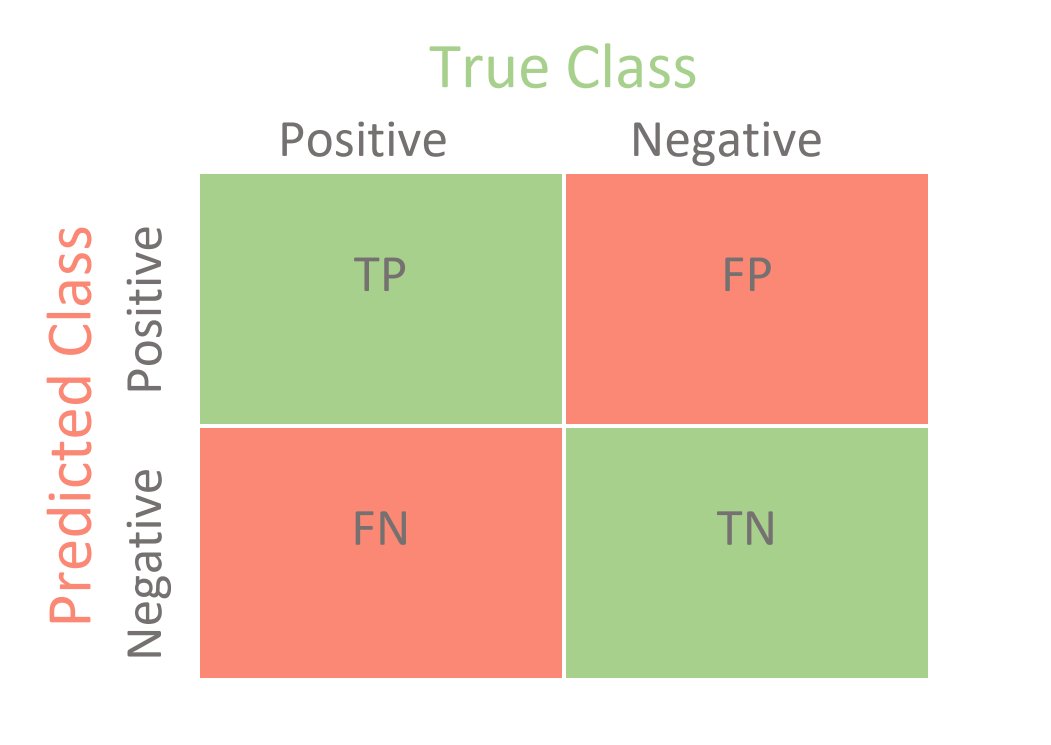

In [26]:
confusion_matrix (y_pred, y_test, labels = ['FAKE','REAL'])

array([[4656,   89],
       [  75, 4160]])

I can see that the classifier predicted more false positives than false negatives. I would have liked it the other way round. However, a 98.7 accuracy is a good start.

# Predicting Fake/Real News by Titles

Till now, I've been training my classifier to look at news articles. Let's see if it can achieve the same results with the titles. 

In [35]:
#Train-test split. 1 denotes predictions made by titles

X1_train,X1_test,y1_train,y1_test = train_test_split(df['title'],df['Real/Fake'], train_size = 0.8, random_state = 88)

In [38]:
# Tfidf Vectorizer

vectorizer1 = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
vec1_train = vectorizer1.fit_transform(X1_train)
vec1_test = vectorizer1.transform(X1_test)

In [39]:
#Passive Aggressive Classifier

pas_agg_classifier1 = PassiveAggressiveClassifier(max_iter = 50)
pas_agg_classifier1.fit(vec1_train, y1_train)
y1_pred = pas_agg_classifier1.predict(vec1_test)
score = accuracy_score(y1_pred, y1_test)
print('The accuracy score % is: ', round(score * 100,2))

The accuracy score % is:  93.62


We got a accuracy of 93.62%. This is a good score considering the lesser words the classifier had to work with

In [40]:
confusion_matrix (y1_pred, y1_test, labels = ['FAKE','REAL'])

array([[4446,  283],
       [ 290, 3961]])

This case, we got more false negatives than false positives (by 7 news articles). I like this result.

## Using an alternative classifier : Logistic Regression

In my road to choosing the PassiveAggressiveClassifier, I was interested in Logistic Regression. Let's see if it beats the PassiveAggressiveClassifier.



Legend:
    * the 'l' in variables mean text logistic regression
    * the 'l1' in variable mean title logistic regression

## Text

In [41]:
#Train-test split

Xl_train,Xl_test,yl_train,yl_test = train_test_split(df['text'],df['Real/Fake'], train_size = 0.8, random_state = 42)


In [42]:
#Creating a tfidf Vectorizer

vectorizerl = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

vecl_train = vectorizerl.fit_transform(Xl_train)
vecl_test = vectorizerl.transform(Xl_test)

In [45]:
#Logistic Regression Classifier

log_reg = LogisticRegression()
log_reg.fit(vecl_train,yl_train)
yl_pred = log_reg.predict(vecl_test)

In [49]:
accuracy_l = accuracy_score(yl_pred,yl_test)
print('The accuracy of using Logistic Regression on text is ', round(accuracy_l * 100,2))

The accuracy of using Logistic Regression on text is  97.1


In [50]:
confusion_matrix(yl_pred,yl_test)

array([[4616,  145],
       [ 115, 4104]])

## Title

In [51]:
#Train-test split

Xl1_train,Xl1_test,yl1_train,yl1_test = train_test_split(df['title'],df['Real/Fake'], train_size = 0.8, random_state = 88)



In [52]:
#Creating a tfidf Vectorizer

vectorizerl1 = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

vecl1_train = vectorizerl1.fit_transform(Xl1_train)
vecl1_test = vectorizerl1.transform(Xl1_test)

In [53]:
#Logistic Regression Classifier

log_reg1 = LogisticRegression()
log_reg1.fit(vecl1_train,yl1_train)
yl1_pred = log_reg1.predict(vecl1_test)

In [54]:
accuracy_l1 = accuracy_score(yl1_pred,yl1_test)
print('The accuracy of using Logistic Regression on text is ', round(accuracy_l1 * 100,2))

The accuracy of using Logistic Regression on text is  94.34


In [55]:
confusion_matrix(yl1_pred,yl1_test)

array([[4449,  221],
       [ 287, 4023]])

Well the Logistic Regression classifier didn't do as well as the Passive Aggressive Classifier when it came to text, but did slightly better on titles.

# Summary

| Classifier                  | Precision    |    Recall    | Accuracy    |
| :-------------              | :----------: | -----------: | ----------: |
|  Passive Aggressive (Text)  | 0.9812       | 0.9841       | 98.70       |   
|  Passive Aggressive (Title) | 0.9401       | 0.9387       | 93.62       |
|  Logistic Regression (Text) | 0.9695       | 0.9756       | 97.10       |
|  Logistic Regression (Title)| 0.9526       | 0.9394       | 94.34       |   

Where,
 * Precision : True Positive / (True Positive + False Positive)
 * Recall : True Positive / (True Positive + False Negative)

Precision means the percentage of your results which are relevant. 

On the other hand, recall refers to the percentage of total relevant results correctly classified by your algorithm. 




(Precision v/s Recall - Shruthi Saxena)